In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn import metrics
import shap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/MK2.csv')
y = pd.DataFrame(data['Yield'],columns=['Yield'])
X = data.drop(columns=['Yield', 'Ligand_name', 'Ligand_smiles', 'Substrate_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, shuffle=False)
a_X_train = (X_train - X_train.mean()) / X_train.std()
a_X_test = (X_test - X_train.mean()) / X_train.std()
a_X_train = a_X_train.dropna(how='any', axis=1)
a_X_test = a_X_test[a_X_train.columns]

print(y_train.head())
print(X_train.head())

   Yield
0   20.0
1    9.0
2    7.0
3   18.0
4   34.0
   L_MK_9  L_MK_28  L_MK_29  L_MK_30  L_MK_31  L_MK_35  L_MK_36  L_MK_39  \
0     0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0   
1     0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0   
2     0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      1.0      1.0      0.0      0.0      0.0      0.0      0.0   

   L_MK_40  L_MK_41  ...  S_MK_149  S_MK_152  S_MK_154  S_MK_157  S_MK_159  \
0      0.0      0.0  ...       0.0       1.0       1.0       0.0       0.0   
1      0.0      0.0  ...       1.0       1.0       1.0       0.0       0.0   
2      0.0      0.0  ...       1.0       1.0       1.0       1.0       1.0   
3      0.0      0.0  ...       0.0       1.0       1.0       0.0       0.0   
4      0.0      0.0  ...       0.0       1.0       1.0       0.0       0.0   

   S_MK_160  S_MK_16

In [3]:
model = RidgeCV(alphas=np.linspace(0.1, 30, num=150), cv=5)
model.fit(a_X_train, y_train['Yield'])
y_pred = model.predict(a_X_train)

print(metrics.r2_score(y_train, y_pred))

0.7190628840791564


Text(0, 0.5, 'prediction')

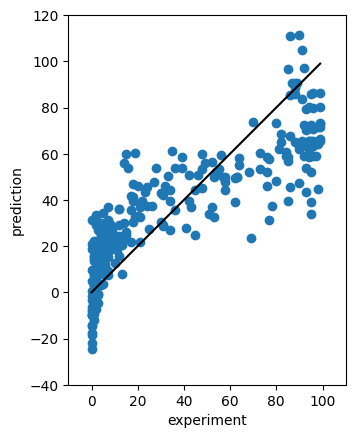

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(0,100),range(0,100), c = "black")
plt.scatter(y_train, y_pred)
plt.xlim(-10,110)
plt.ylim(-40,120)
ax.set_aspect('equal', adjustable='box')
plt.xlabel("experiment")
plt.ylabel("prediction")

In [5]:
explainer = shap.LinearExplainer(model, a_X_train)
shap_values1 = explainer(a_X_train)
shap_values2 = explainer(a_X_test)

In [6]:
y_pred_test = model.predict(a_X_test)
print('1st (L64) :', y_pred_test[33])
print('2nd (L34) :', y_pred_test[3])
print('3rd (L60) :', y_pred_test[29])
print('4th (L33) :', y_pred_test[2])
print('5th (L72) :', y_pred_test[41])

1st (L64) : 74.94741774825067
2nd (L34) : 72.75943520772131
3rd (L60) : 50.50682232363953
4th (L33) : 45.22400034576986
5th (L72) : 45.10330506348448


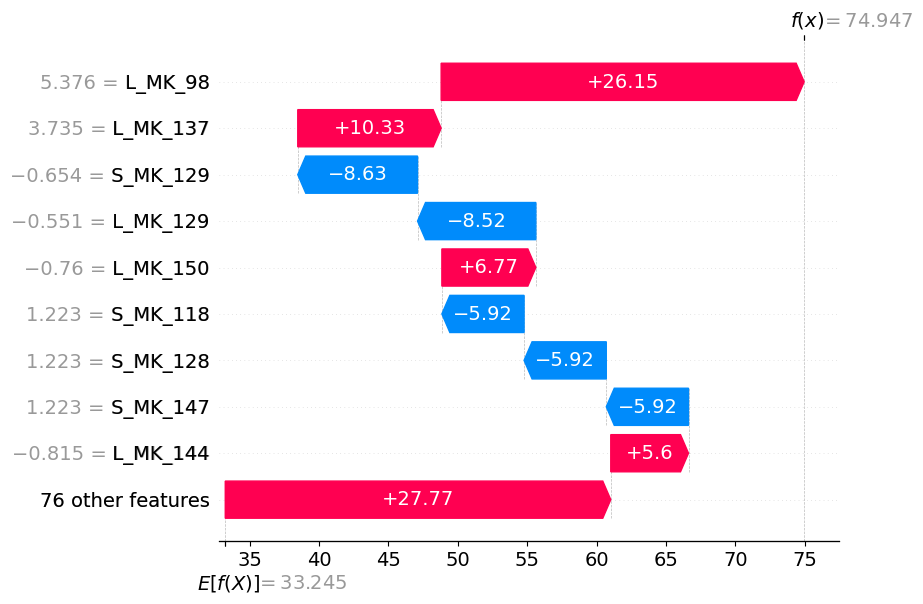

In [7]:
# L64
entry = 33
fig = plt.figure()
shap.plots.waterfall(shap_values2[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/prediction/waterfall_L64_Ridge.pdf')

In [8]:
data_train, data_test = train_test_split(data, train_size=300, shuffle=False)
data_at = data_train.query('Substrate_name == "alpha-tetralone"')
data_L12 = data_at.query('Ligand_name == "L12"')
data_L12

,Ligand_name,Ligand_smiles,L_MK_9,L_MK_28,L_MK_29,L_MK_30,L_MK_31,L_MK_35,L_MK_36,L_MK_39,...,S_MK_152,S_MK_154,S_MK_157,S_MK_159,S_MK_160,S_MK_162,S_MK_163,S_MK_164,S_MK_165,Yield
117,L12,P(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,26.0


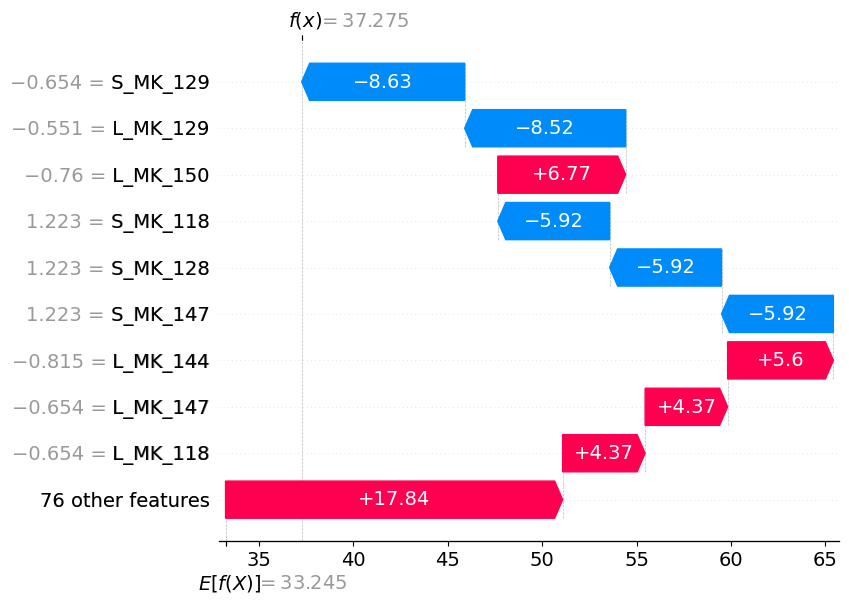

In [9]:
entry = 117
fig = plt.figure()
shap.plots.waterfall(shap_values1[entry], show=False, max_display=10)
for text_obj in fig.findobj(match=plt.Text):
    text_obj.set_fontsize(14)
plt.show()
fig.savefig('result/SHAP/training/waterfall_L117_Ridge.pdf')

L1


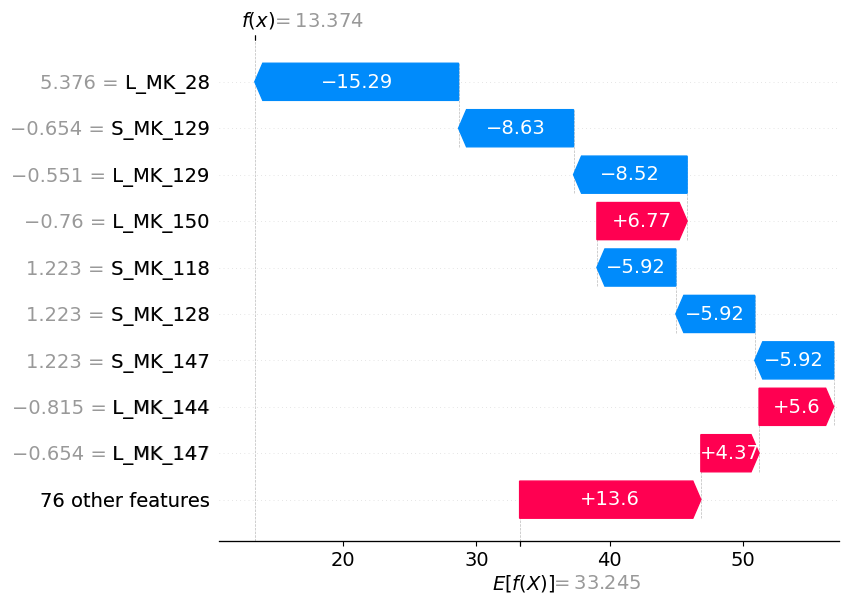

L2


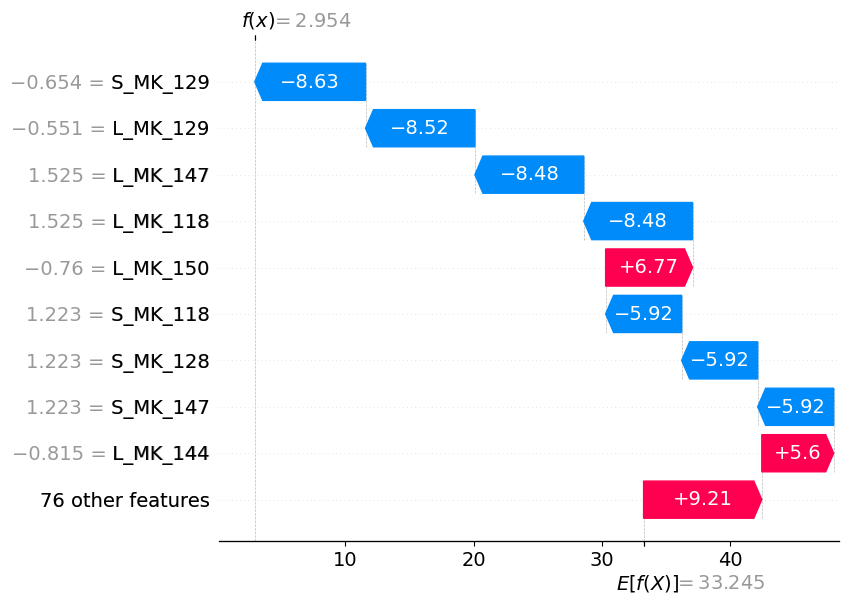

L3


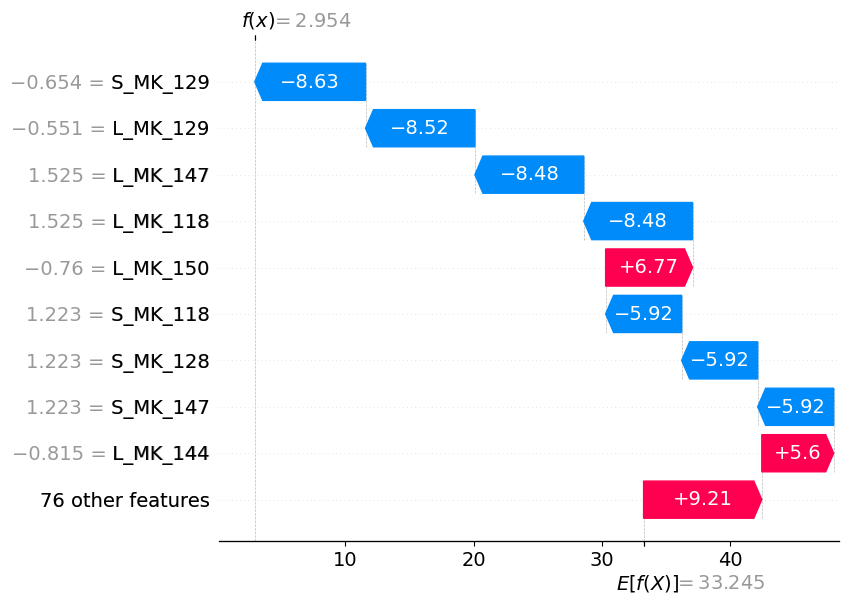

L4


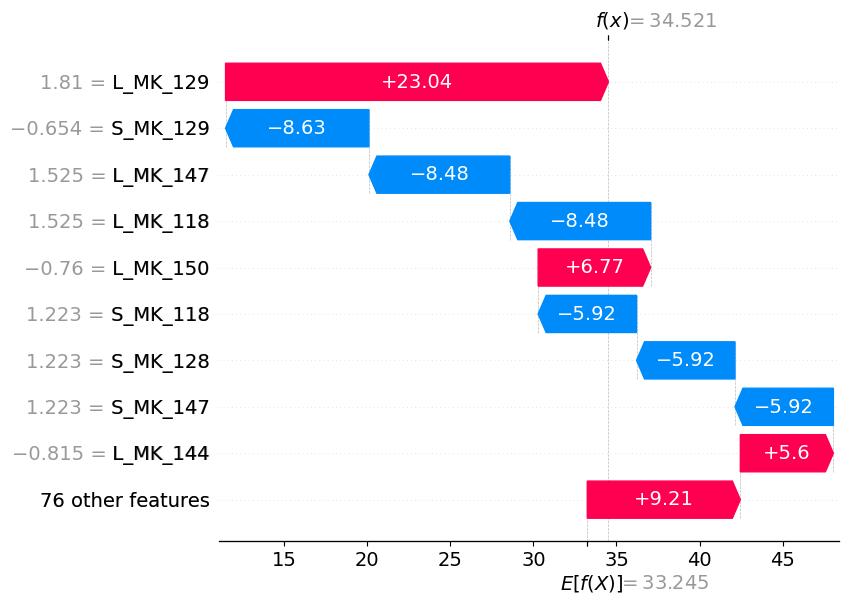

L5


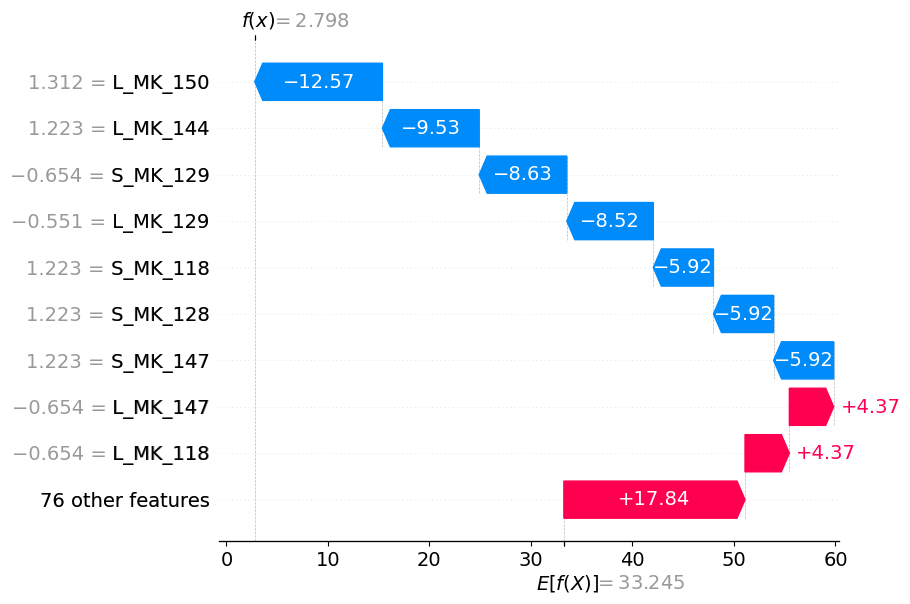

L6


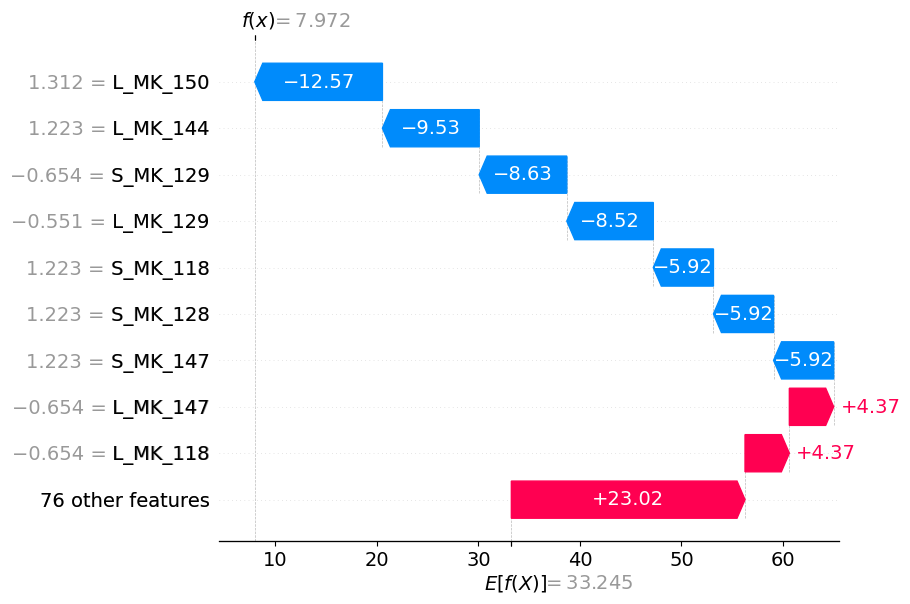

L7


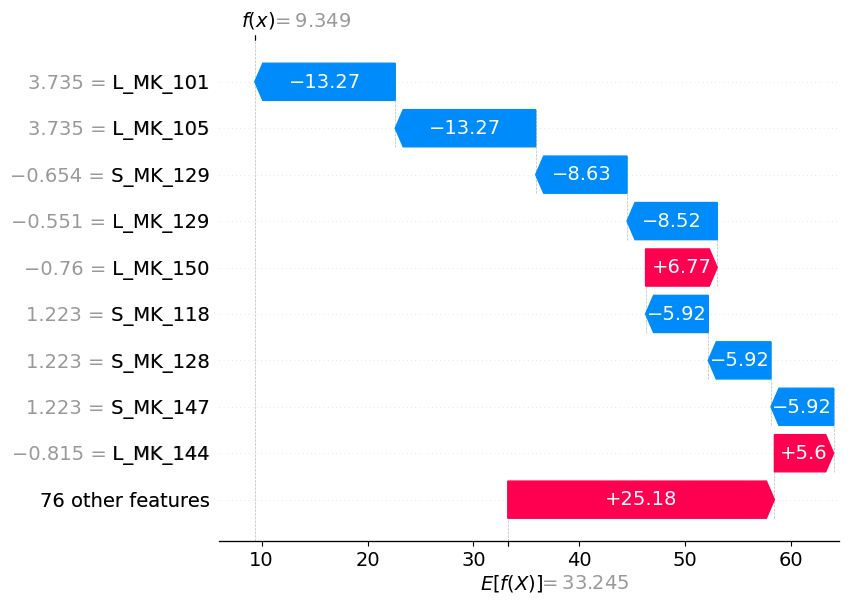

L8


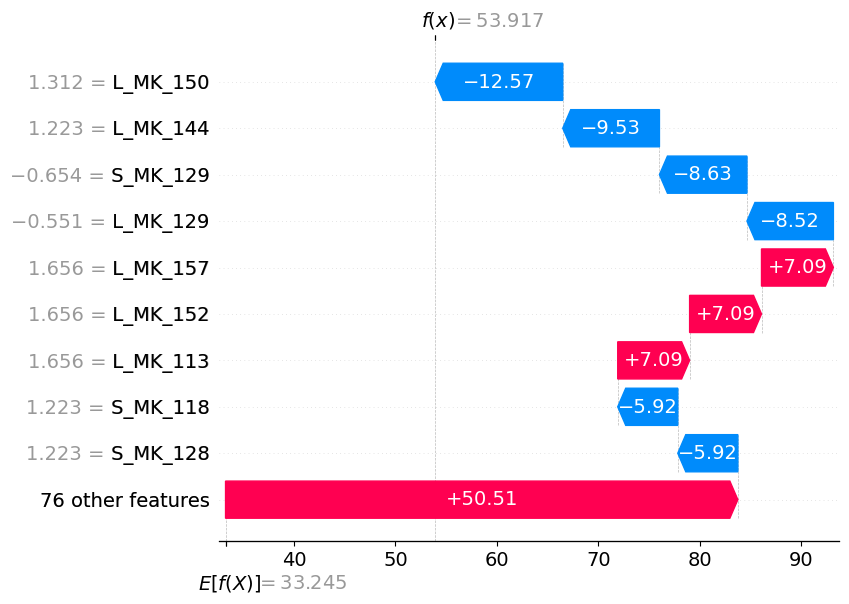

L9


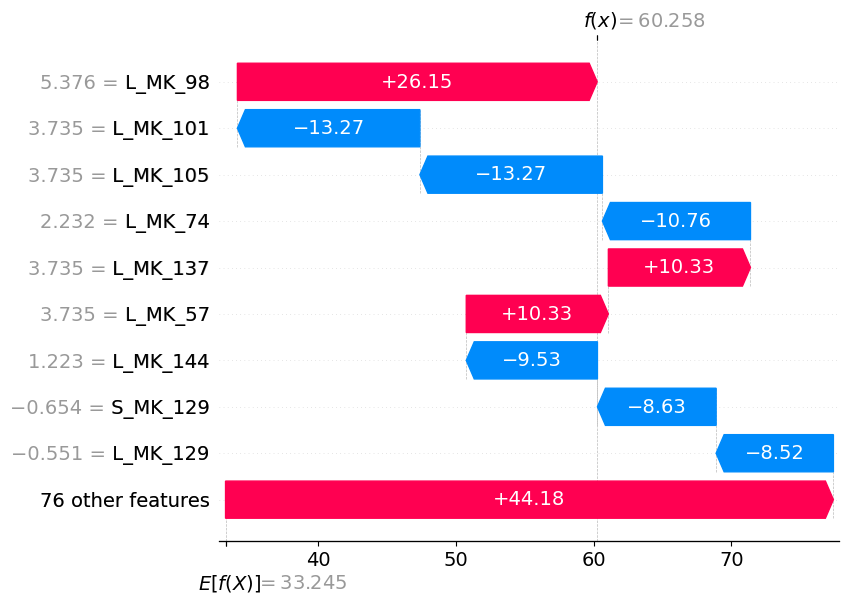

L10


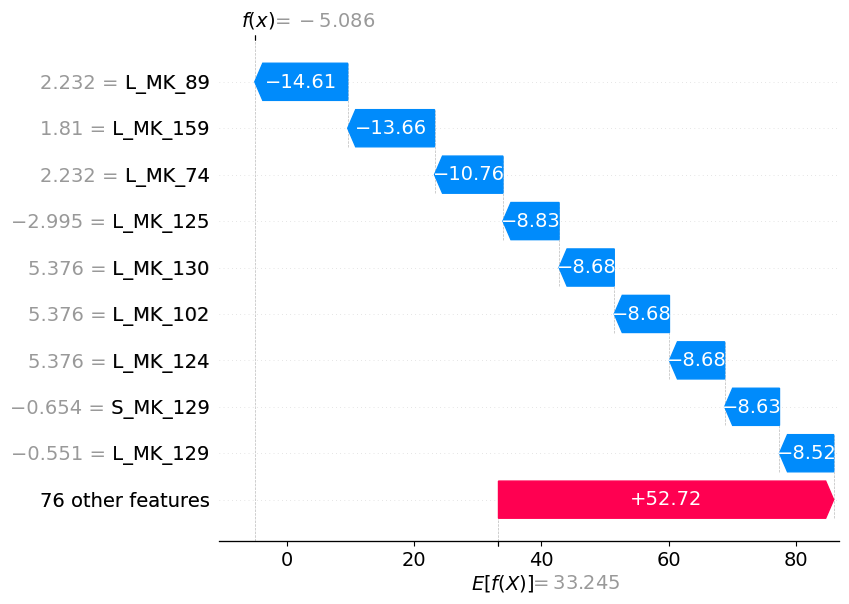

L11


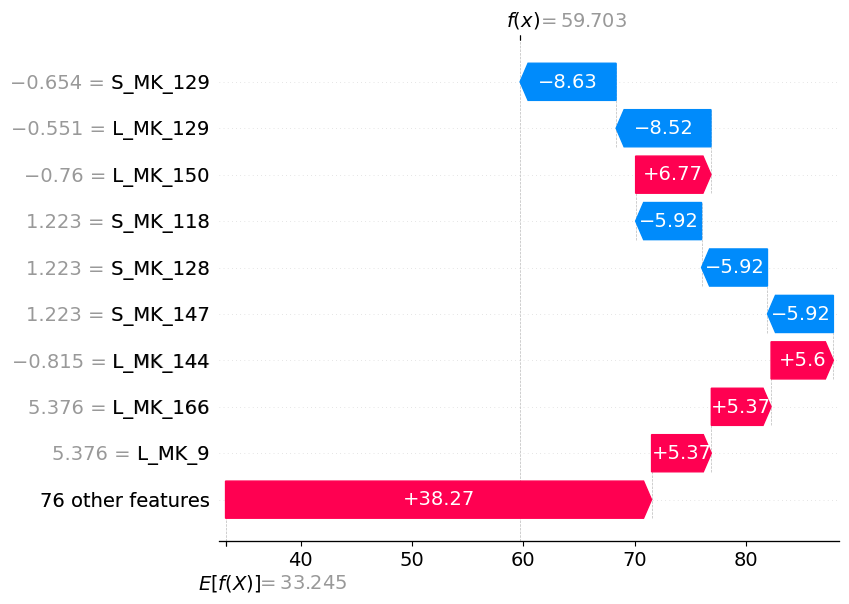

L12


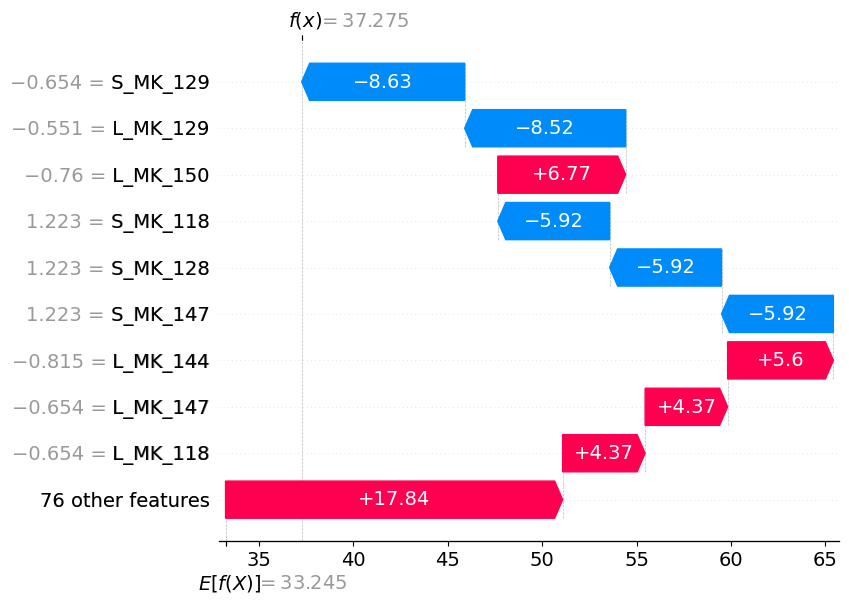

L13


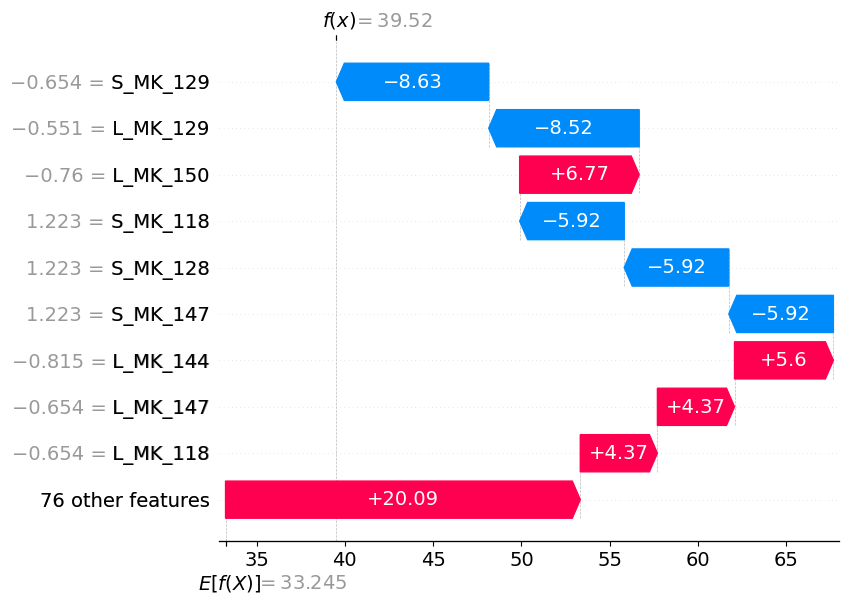

L14


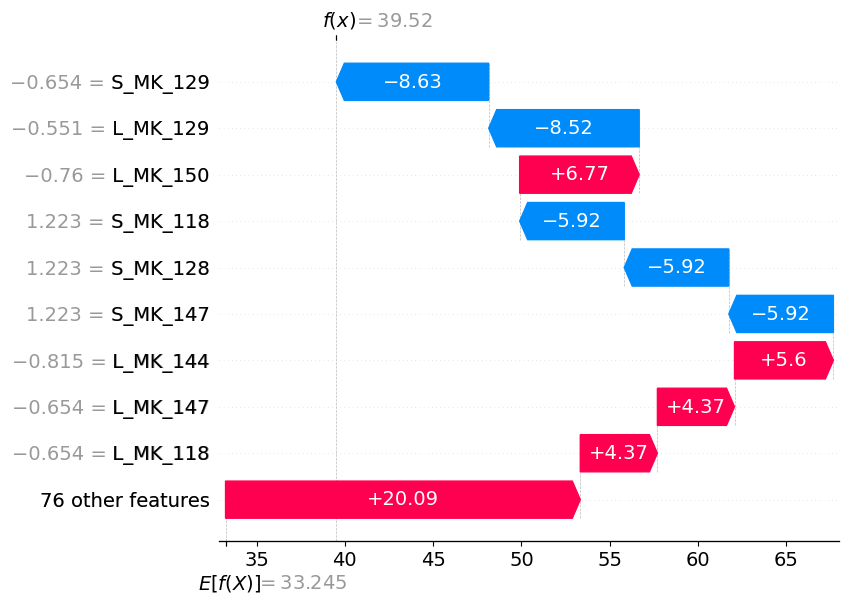

L15


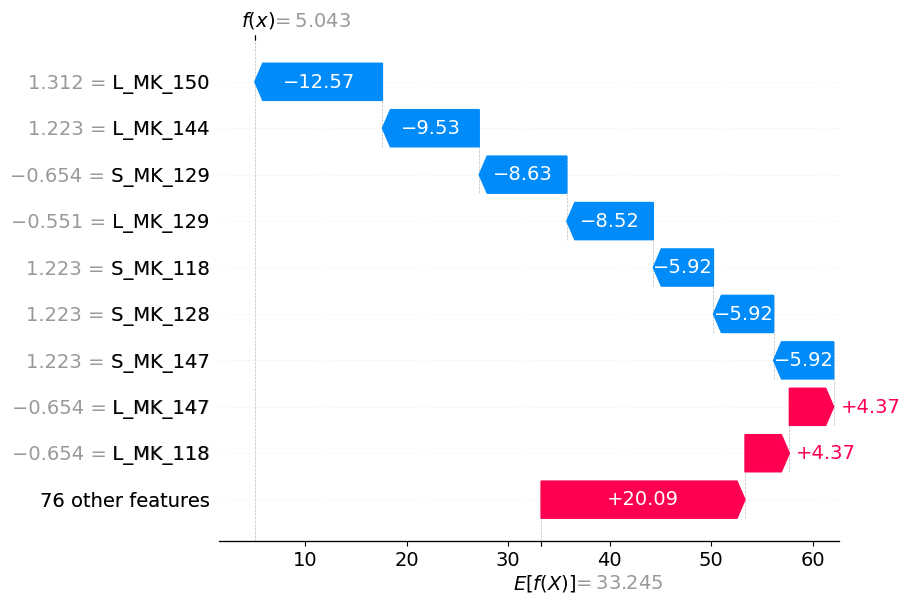

L16


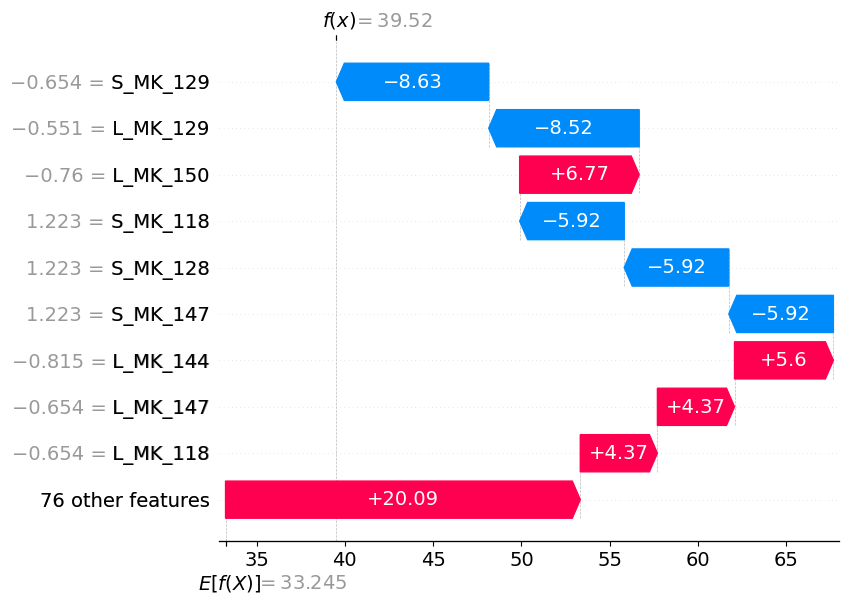

L17


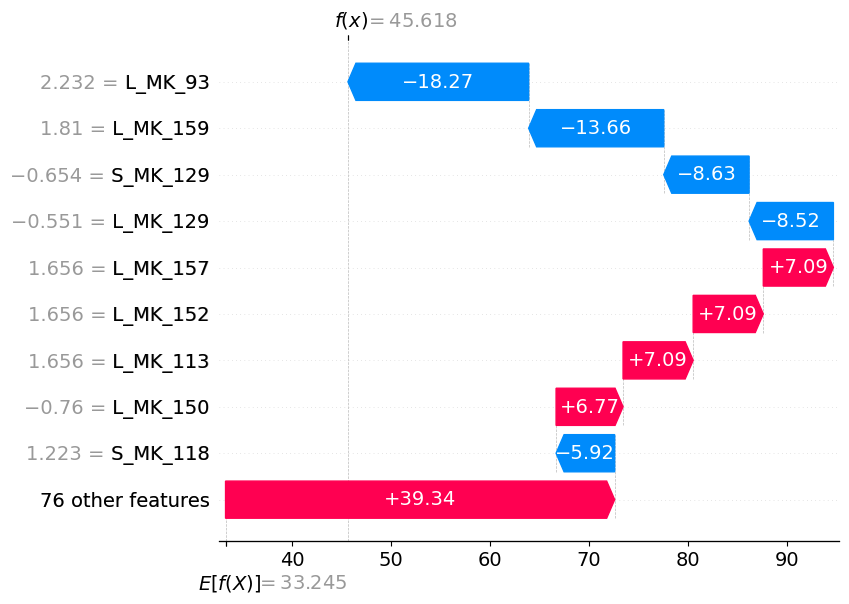

L18


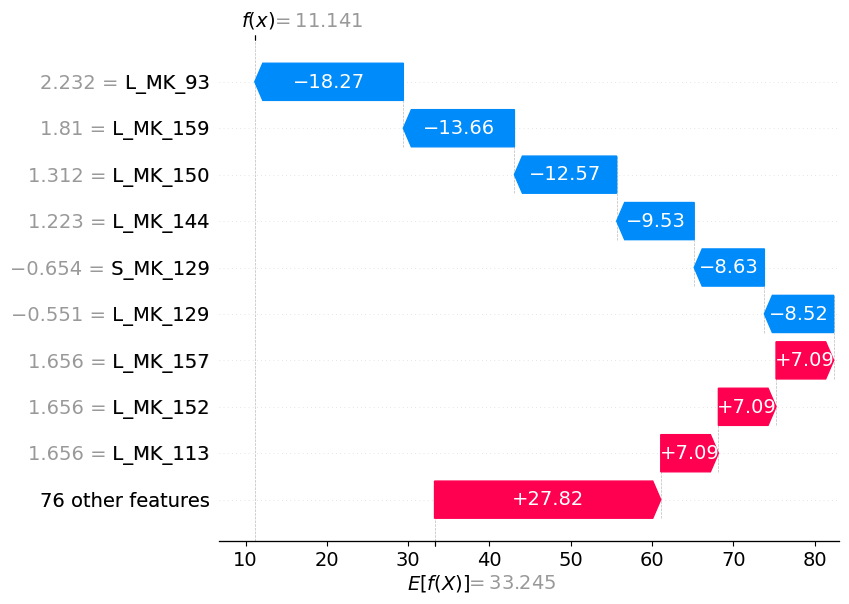

L19


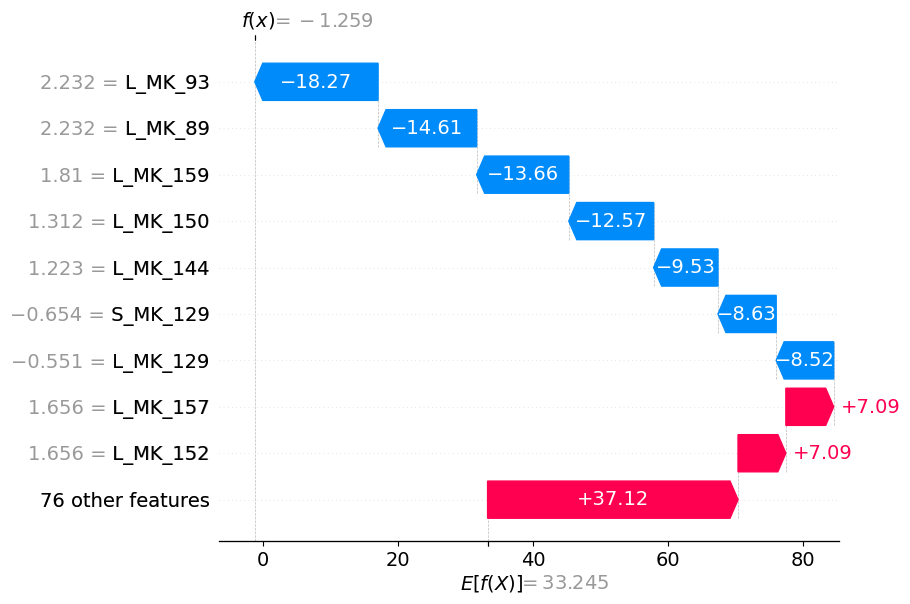

L20


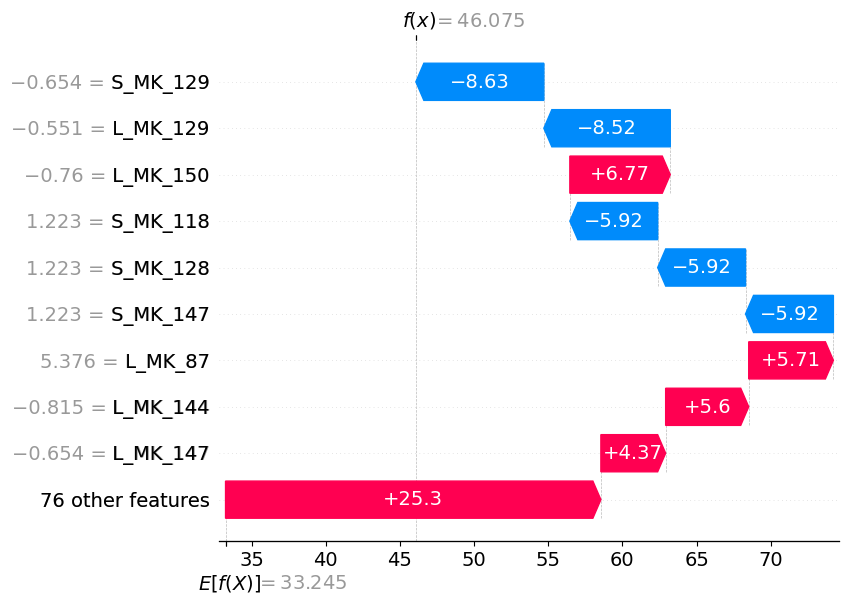

L21


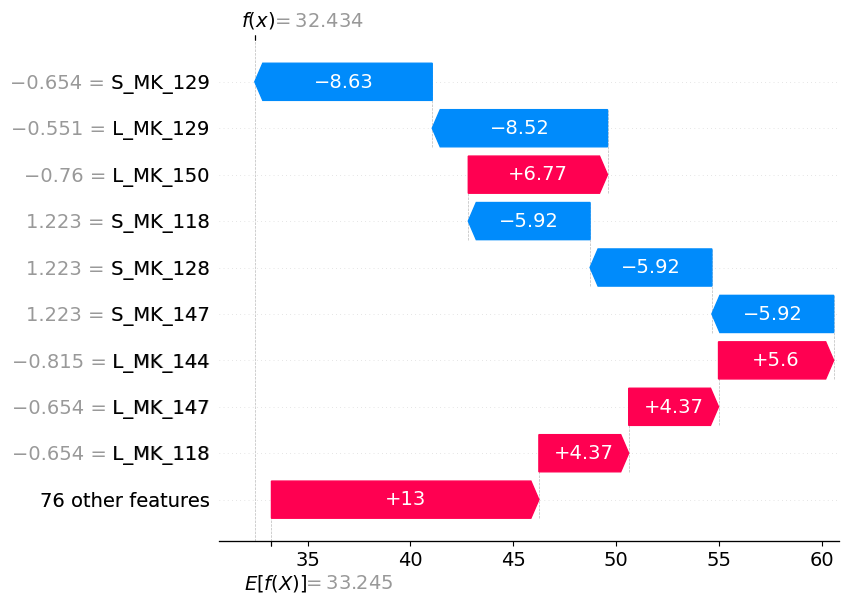

L22


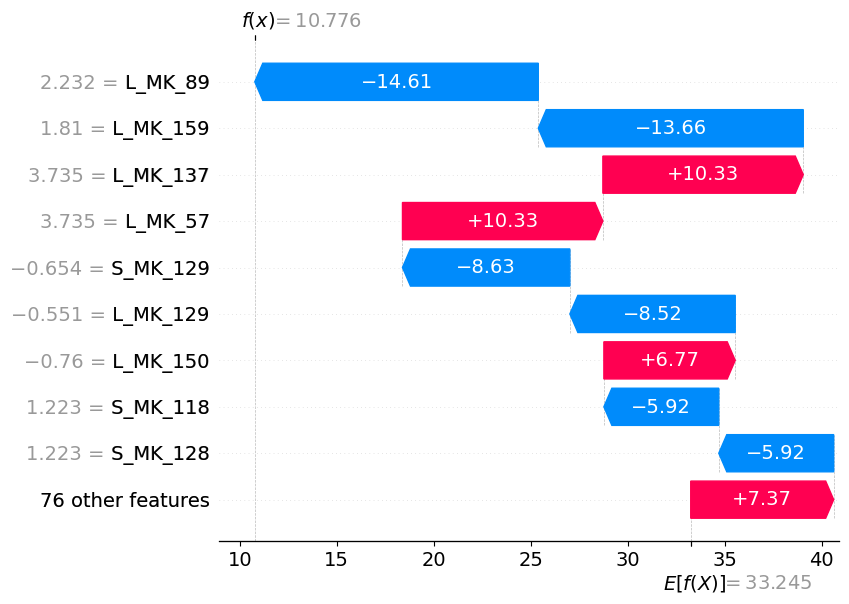

L23


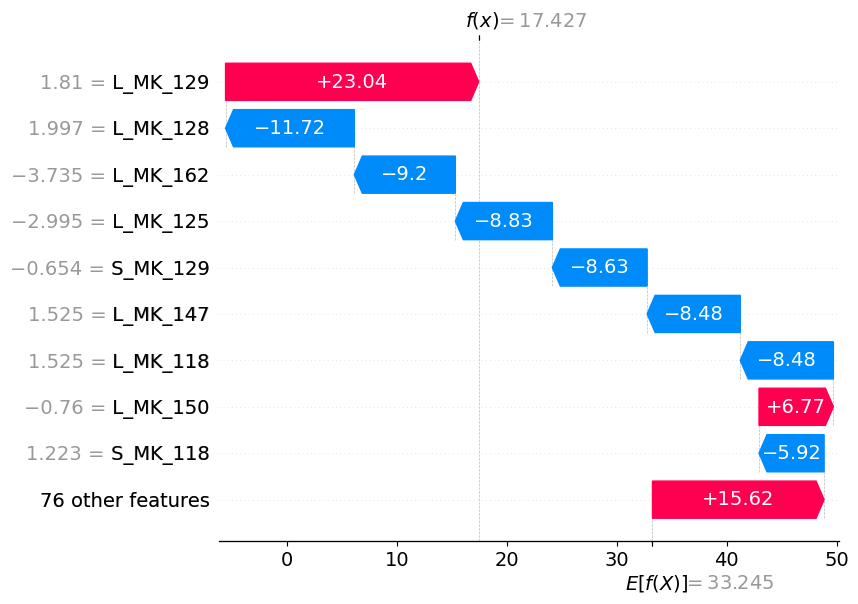

L24


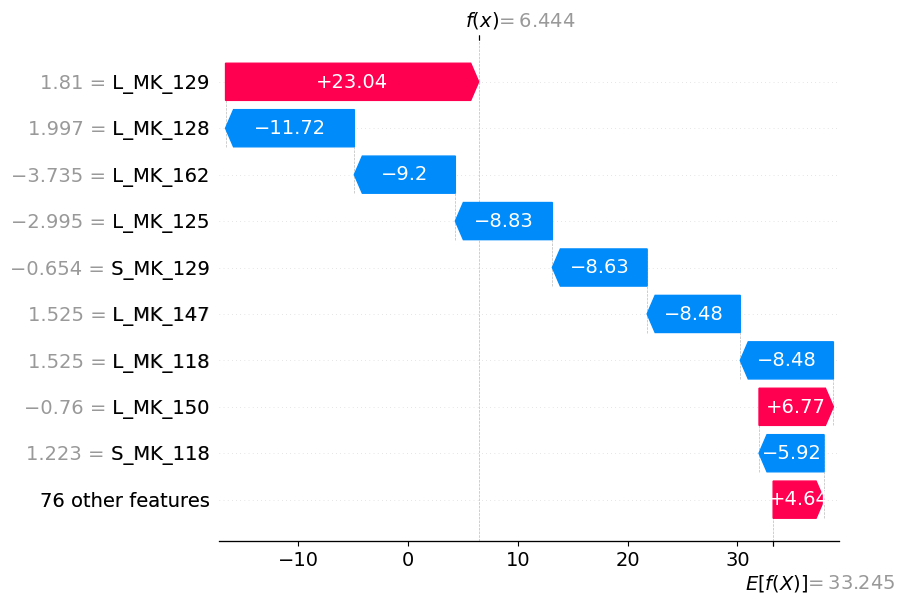

L25


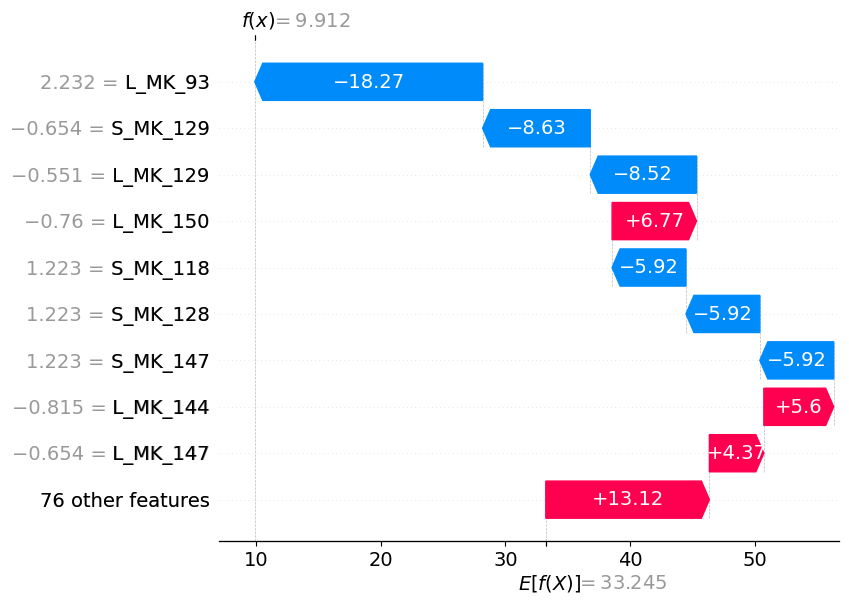

L26


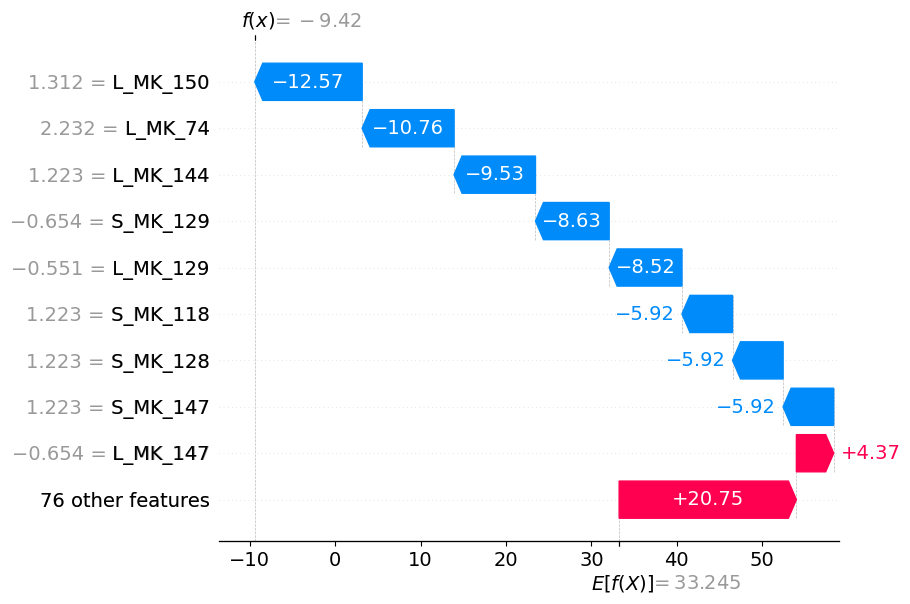

L27


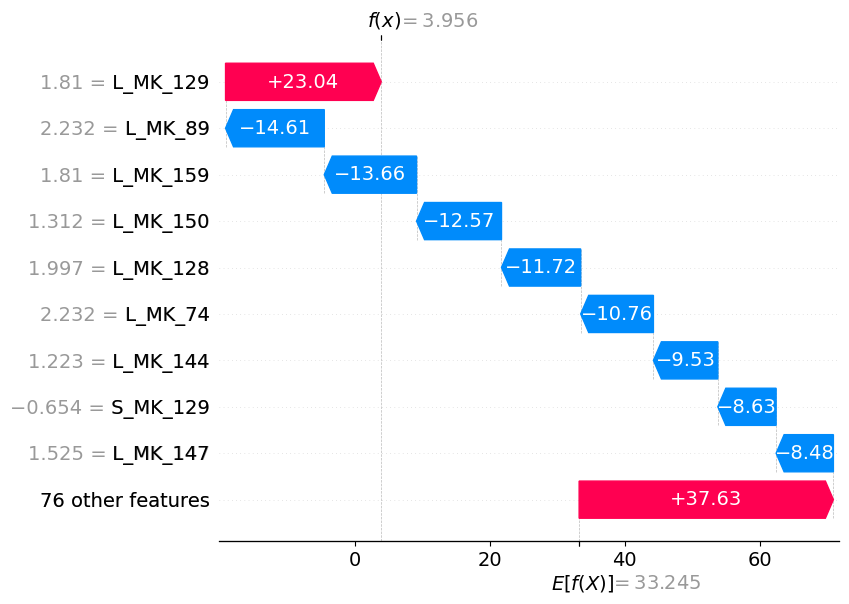

L28


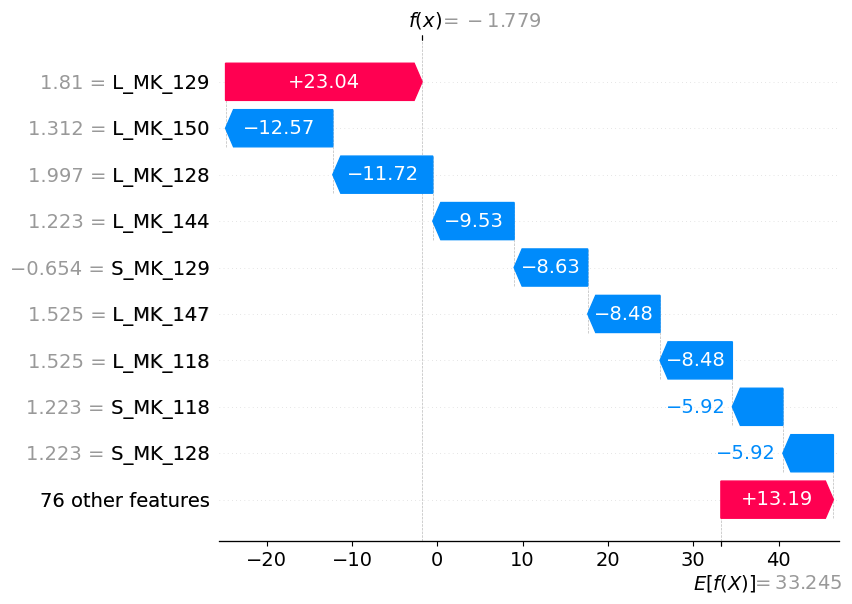

L29


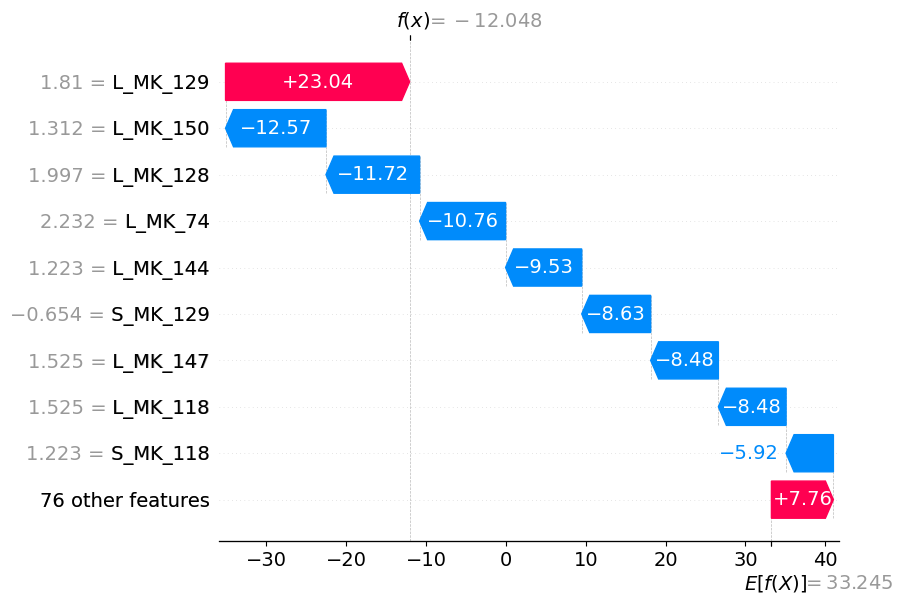

L30


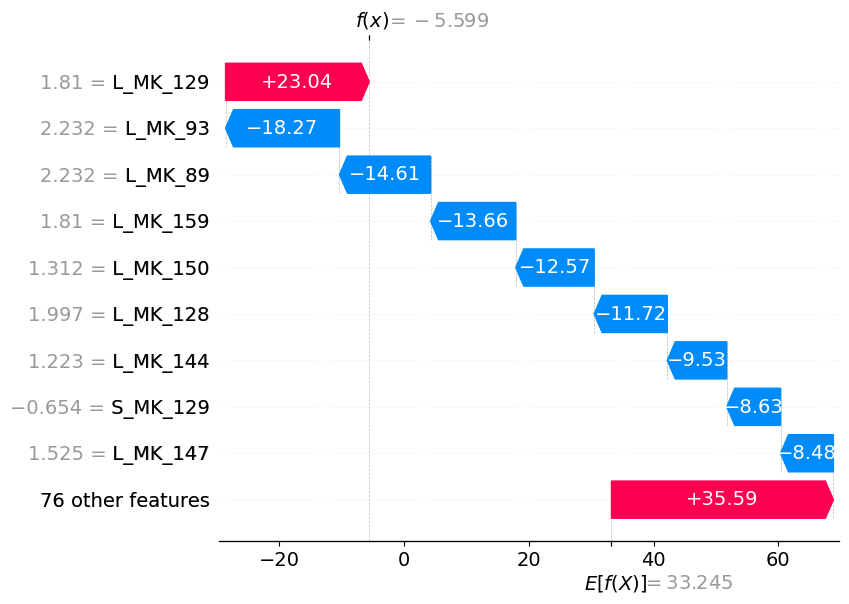

In [12]:
for i in list(range(7, 298, 10)):
    j = int((i-7)/10+1)
    print(f'L{j}')
    fig = plt.figure()
    shap.plots.waterfall(shap_values1[i], show=False, max_display=10)
    for text_obj in fig.findobj(match=plt.Text):
        text_obj.set_fontsize(14)
    plt.show()
    fig.savefig(f'result/SHAP/20/waterfall_L{j}_Ridge.pdf')

In [10]:
# Output PDF files were deleted in Github.